<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-3-phase-2-kingsuching/blob/main/DATA_301_Lab_3_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv.
- The codebook (explaining what the variables mean) is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/codebook.csv.

In [ ]:
# READ IN THE DATA SET HERE
import pandas as pd
import numpy as np
df_replication = pd.read_csv("https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv")
df_replication.head()

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,PR.1,PR.2,MCS.1,Scorer.1,MCS.2,Scorer.2,MCS.avg,R1CS.1,Scorer.1.1,R1CS.2,Scorer.2.1,R1CS.avg,R2CS.1,Scorer.1.2,R2CS.2,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,1.0,0.80,0.750,NK,0.670,TT,0.7100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.400,NK,0.367,TT,0.3835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.433,NK,0.550,MS,0.4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.317,NK,0.333,MS,0.3250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,0.0,0.95,0.683,NK,0.717,MS,0.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later.

Condition
Concept      AxesSubplot(0.125,0.125;0.775x0.755)
Retrieval    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PR.2, dtype: object

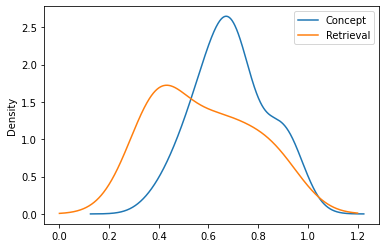

In [ ]:
# YOUR CODE HERE
df_replication.groupby("Condition")["PR.2"].plot.density(legend=True)

**YOUR EXPLANATION HERE**

Participants with the concept mapping task felt like they learned more than the retreival task since more of them predicted better test scores on the test one week later.

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

Condition
Concept      AxesSubplot(0.125,0.125;0.775x0.755)
Retrieval    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TS.avg, dtype: object

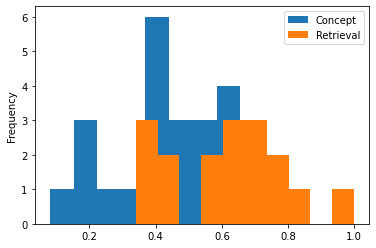

In [ ]:
# YOUR CODE HERE
df_replication.groupby("Condition")["TS.avg"].plot.hist(legend=True)

**YOUR EXPLANATION HERE**

The participants blocked into the retreival group did better on the test on average one week later, despite the contrary prediction from question 1.

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

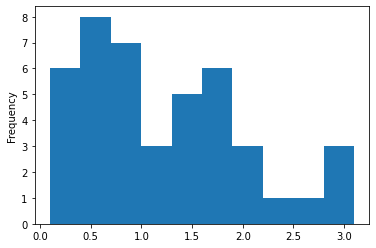

In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import *
from sklearn.metrics.pairwise import euclidean_distances
scaler = StandardScaler()
scaler.fit(df_replication[["PR.2", "TS.avg"]])
transformed = scaler.transform(df_replication[["PR.2", "TS.avg"]])
transformed = pd.DataFrame(transformed)

def accuracy(x):
  x1 = transformed.loc[[x], [0]]
  x2 =  transformed.loc[[x], [1]]
  return euclidean_distances(x1, x2)[0][0]

df_replication["accuracy"] = df_replication.index.map(accuracy)
df_replication["accuracy"].plot.hist()

We see that more of the predictions were clustered between 0-1, which shows that a lot of the participants had better predictions of how they would do on the test.

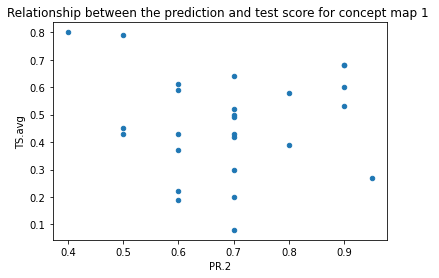

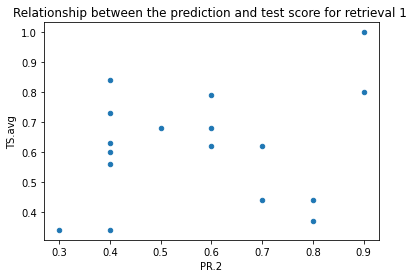

In [ ]:
df_blunt_essential = df_replication[["ID","Condition","PR.2","TS.avg"]]
df_blunt_essential = df_blunt_essential.set_index(["ID"])
df_blunt_essential_concept = df_blunt_essential[df_blunt_essential["Condition"] == "Concept"].copy().drop(["Condition"], axis = 1)
df_blunt_essential_retrieval = df_blunt_essential[df_blunt_essential["Condition"] == "Retrieval"].copy().drop(["Condition"], axis = 1)

df_blunt_essential_concept.plot.scatter(x = "PR.2", y = "TS.avg", title = "Relationship between the prediction and test score for concept map 1 ")
df_blunt_essential_retrieval.plot.scatter(x = "PR.2", y = "TS.avg", title = "Relationship between the prediction and test score for retrieval 1 ")

The standard deviation of how close the prediction to the test score for the concept map group is 0.239861


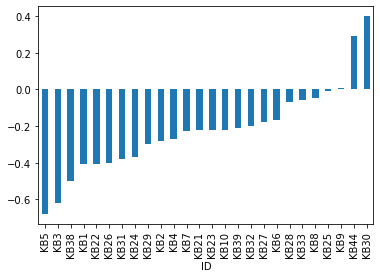

In [ ]:
df_blunt_essential_concept["Prediction Distance"] = df_blunt_essential_concept["TS.avg"] - df_blunt_essential_concept["PR.2"] 
df_blunt_essential_concept["Prediction Distance"].sort_values().plot.bar()
print("The standard deviation of how close the prediction to the test score for the concept map group is %f" % df_blunt_essential_concept["Prediction Distance"].std())

The standard deviation of how close the prediction to the test score for the concept map group is 0.234894


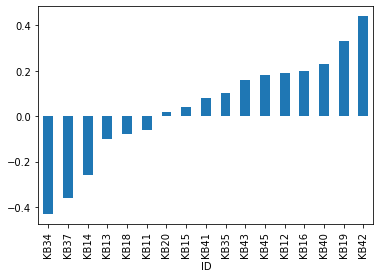

In [ ]:
df_blunt_essential_retrieval["Prediction Distance"] = df_blunt_essential_retrieval["TS.avg"] - df_blunt_essential_retrieval["PR.2"] 
df_blunt_essential_retrieval["Prediction Distance"].sort_values().plot.bar()
print("The standard deviation of how close the prediction to the test score for the concept map group is %f" % df_blunt_essential_retrieval["Prediction Distance"].std())

**The standard deviation of the prediction distance(the difference between the prediction and final score)is 0.239861 and 0.234894 for the concept map group and the retrieval group respectively.** 
**The retrieval map group has a slightly lower standard deviation in predicting how well they would do on the follow-up learning test. However, I think the different is not significant enough to suggest that the retrieval group have a prediction in how well they would do on the follow-up learning test.**

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 3 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partner for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.